Chapter 20

# 抛硬币
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码模拟了一次抛硬币实验，意图通过可视化展示独立随机试验中的正反面分布及其累计均值的收敛性。代码设置了100次抛掷，每次结果为0（反面）或1（正面）。这些结果可以看作是一个伯努利试验的序列，其中每次试验的成功概率（即正面概率）为0.5。

首先，代码生成了一组抛掷数据，并将正面结果标记为红色点，反面结果标记为蓝色叉，以便观察每次抛掷的具体输出。接下来，通过计算每次试验的累计均值，代码在图中展示了随着试验次数增加，正面结果的累计比例如何逐渐收敛于0.5。

对于每次试验 \( k \) 后的累计均值 \( \text{cum\_mean}(k) \)，计算公式为：

$$
\text{cum\_mean}(k) = \frac{\sum_{i=1}^{k} \text{结果}_i}{k}
$$

代码通过第二个子图展示了这一累计均值曲线，并用红色水平线标记了理论均值0.5。随着试验次数的增加，累计均值逐渐趋近于0.5，这体现了大数定律的效果，即在大量独立同分布的伯努利试验中，正面和反面的出现比例趋向于0.5。这种收敛性在实际应用中为概率的频率解释提供了直观依据。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度


## 抛硬币实验

In [3]:
num_toss = 100  # 硬币抛掷次数
toss = np.random.randint(low=0, high=2, size=(num_toss, 1))  # 随机生成0或1代表抛掷结果

In [4]:
up = (toss == 1)  # 判定正面朝上的结果

In [5]:
iteration = np.arange(1, num_toss + 1)  # 记录每次抛掷的次数

## 可视化

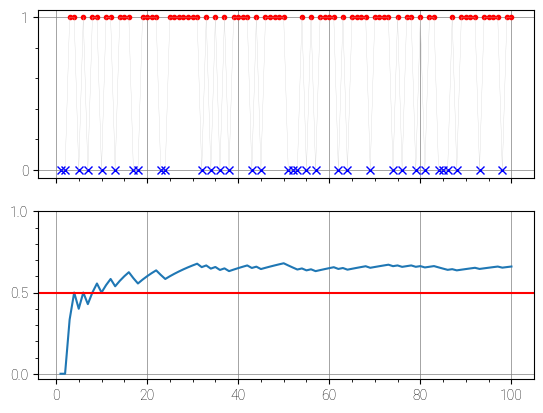

In [6]:
fig, axs = plt.subplots(2, 1, sharex = True)  # 创建子图

## 可视化1：抛掷结果散点图
axs[0].plot(iteration[up.flatten()], toss[up],  
         color='r', marker='.', linestyle='None')  # 正面结果为红色圆点

axs[0].plot(iteration[~up.flatten()], toss[~up], 
         color='b', marker='x', linestyle='None')  # 反面结果为蓝色叉号
axs[0].plot(iteration,toss,color = '0.8', lw = 0.2)
axs[0].set_yticks([0, 1])  # 设置y轴刻度为0和1

## 可视化2：累计均值曲线
cum_mean = np.cumsum(toss) / iteration  # 计算每次抛掷的累计均值

axs[1].plot(iteration, cum_mean)  # 绘制累计均值曲线
axs[1].axhline(y=0.5, color='r')  # 绘制参考线y=0.5
axs[1].set_yticks([0, 0.5, 1])  # 设置y轴刻度